In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

try:
    plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
except:
    try:
        plt.rcParams['font.family'] = 'NanumGothic'
    except:
        plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['axes.unicode_minus'] = False
fm._load_fontmanager(try_read_cache=False)

df = pd.read_csv("bank-additional-full.csv", sep=";")
df_backup = df.copy()

Matplotlib is building the font cache; this may take a moment.


# 1. 데이터 파악 및 칼럼 탐구

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df[df.duplicated(keep=False)]
df = df.drop_duplicates()
df_dropped_na = df.copy()

| 컬럼명 | 설명 |
|--------|------|
| **age** | **나이 (숫자)** |
| **job** | **직업 (범주형)** |
| **marital** | **결혼 여부 (범주형)** |
| **education** | **교육 수준 (범주형)** |
| **default** | **신용 불량 여부 (범주형)** |
| **housing** | **주택 대출 여부 (범주형)** |
| **loan** | **개인 대출 여부 (범주형)** |
| **contact** | **연락 유형 (범주형)** |
| **month** | **마지막 연락 월 (범주형)** |
| **day_of_week** | **마지막 연락 요일 (범주형)** |
| **duration** | **마지막 연락 지속 시간, 초 단위 (숫자)** |
| **campaign** | **캠페인 동안 연락 횟수 (숫자)** |
| **pdays** | **이전 캠페인 후 지난 일수 (숫자)** |
| **previous** | **이전 캠페인 동안 연락 횟수 (숫자)** |
| **poutcome** | **이전 캠페인의 결과 (범주형)** |
| **emp.var.rate** | **고용 변동률 (숫자)** |
| **cons.price.idx** | **소비자 물가지수 (숫자)** |
| **cons.conf.idx** | **소비자 신뢰지수 (숫자)** |
| **euribor3m** | **3개월 유리보 금리 (숫자)** |
| **nr.employed** | **고용자 수 (숫자)** |
| **y** | **정기 예금 가입 여부 ('y' 또는 'no'로 표시됨)** |

In [6]:
for i in df.columns:
    print(f"[{i}]", df[i].unique())
    print(f"[{i}]", '\n', df[i].value_counts())

[age] [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
[age] 
 age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64
[job] ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
[job] 
 job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
[marital] ['married' 'single' 'divorced' 'unknown']
[marital] 
 marital
married     24921
single      11564
divorc

In [7]:
# 편의성 위해 y 바꾸기
df.loc[df["y"] != "yes", "y"] = "0"
df.loc[df["y"] == "yes", "y"] = "1"
df["y"] = df["y"].astype(int)

print(f"전체 가입률(마케팅 성공률): {df["y"].mean()*100}% ({df["y"].sum()}/{df["y"].count()})")

전체 가입률(마케팅 성공률): 11.266271614532737% (4639/41176)


- 전체 예금 가입률은 약 11%이다.

- 총 41,176건의 홍보 중 4,639건의 가입이 발생하였다.

- 가입률이 높지 않아 분류 모델 학습에 신중을 기해야 한다.


## 고객 정보

고객 정보에는 Unknown이라는 데이터 값이 존재한다.

상환 능력과 신용 정보로 이루어져 있으며, 금융 상품에 있어 중요한 항목이다.

상환 능력
| 컬럼명 | 설명 |
|--------|------|
| **age** | **나이 (숫자)** |
| **job** | **직업 (범주형)** |
| **marital** | **결혼 여부 (범주형)** |
| **education** | **교육 수준 (범주형)** |


신용 정보
| 컬럼명 | 설명 |
|--------|------|
| **default** | **신용 불량 여부 (범주형)** |
| **housing** | **주택 대출 여부 (범주형)** |
| **loan** | **개인 대출 여부 (범주형)** |


### 고객 정보 가설: Unknown 항목이 많을수록 가입률이 낮을 것이다.

#### 항목별 통계

In [8]:
# unknown이 의미 있는 데이터인지 확인
tmp_list = ["job", "marital", "education", "default", "housing", "loan"]

for i in tmp_list:
    tmp_a = df[(df[i] == "unknown") & (df["y"] != 0)].shape[0]
    tmp_b = df[df[i] == "unknown"].shape[0]
    print(f"unknown {i} 가입률: {(tmp_a * 100 / tmp_b)}% ({tmp_a}/{tmp_b})")

unknown job 가입률: 11.212121212121213% (37/330)
unknown marital 가입률: 15.0% (12/80)
unknown education 가입률: 14.508670520231213% (251/1730)
unknown default 가입률: 5.1535597952536065% (443/8596)
unknown housing 가입률: 10.808080808080808% (107/990)
unknown loan 가입률: 10.808080808080808% (107/990)


- 전체 가입률이 11.3% 정도인 점을 감안하면, 예상보다 유의미한 차이를 만들지는 않는다.

- 결혼 상태, 교육 상태, 신용불량자 상태의 Unknown 데이터가 전체 승인율과 차이 있음을 확인할 수 있다.

#### 상환 능력과 신용 정보 개수별 통계

Unknown 항목의 개수를 나타내는 칼럼을 만든 후, 그룹별 통계를 살펴본다.

In [9]:
# unknown의 개수 나타내는 칼럼 생성

# 상환 능력 정보 중 unknown의 개수
df["unknown_repay"] = 0
tmp_list = ["job", "marital", "education"]

for tmp in tmp_list:
    index = list(df[df[tmp] == "unknown"].index)
    df.loc[index, "unknown_repay"] += 1

# 신용 정보 중 unknown의 개수
df["unknown_credit"] = 0
tmp_list = ["default", "housing", "loan"]

for tmp in tmp_list:
    index = list(df[df[tmp] == "unknown"].index)
    df.loc[index, "unknown_credit"] += 1

# 총 unknown의 개수 = 신용 정보 + 상환 능력
df["unknown_count"] = df["unknown_repay"] + df["unknown_credit"]

   unknown_count      mean   sum  count
0              0  0.126583  3858  30478
1              1  0.069531   628   9032
2              2  0.097160   130   1338
3              3  0.075163    23    306
4              4  0.000000     0     20
5              5  0.000000     0      2


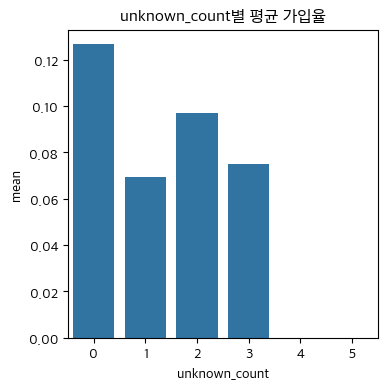

   unknown_repay      mean   sum  count
0              0  0.111256  4359  39180
1              1  0.141088   262   1857
2              2  0.119403    16    134
3              3  0.400000     2      5


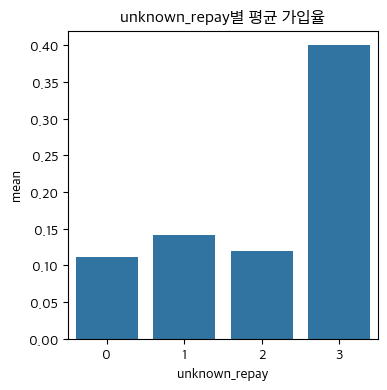

   unknown_credit      mean   sum  count
0               0  0.128862  4100  31817
1               1  0.051619   432   8369
2               2  0.125819    96    763
3               3  0.048458    11    227


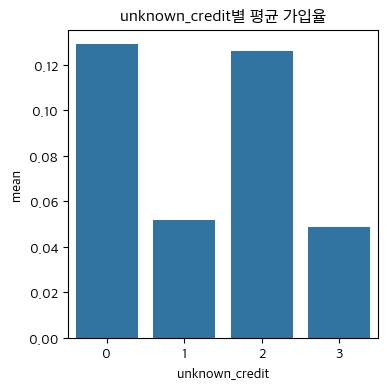

In [42]:
unknown_list = ["unknown_count", "unknown_repay", "unknown_credit"]

# 가설 검증하기
for i in unknown_list:
    tmp_df = df.groupby(i)["y"].agg(["mean", "sum", "count"]).reset_index()
    print(tmp_df)

    plt.figure(figsize=(4,4))
    sns.barplot(data=tmp_df, x=i, y="mean")
    plt.title(f"{i}별 평균 가입율")
    plt.show()

#### 결론: Unknown의 개수는 가입률에 유의미한 영향을 미치지 않는다.

### 추가 가설: 불확실한 정보에 대해 극복할 수 있는 수단으로 통화 횟수와 통화 지속 시간이 작용할 수 있다.

##### 통화 지속 시간

y                       0           1
unknown_count                        
0              220.297258  530.100570
1              223.796882  691.285032
2              215.669702  558.030769
3              207.837456  641.565217
4              253.300000         NaN
5              171.000000         NaN


<Figure size 400x400 with 0 Axes>

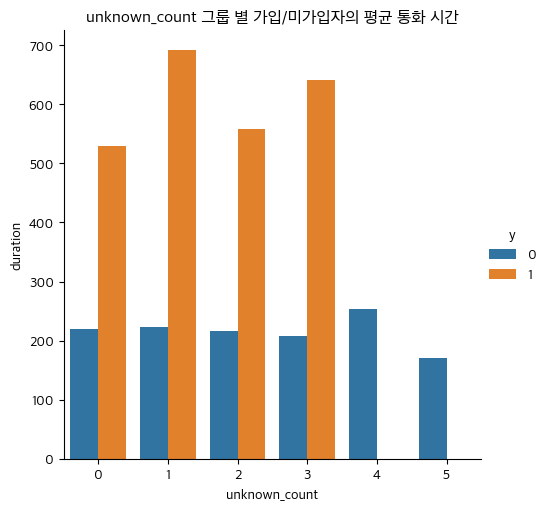

y                       0           1
unknown_repay                        
0              220.692398  556.235146
1              226.942320  516.656489
2              193.084746  342.500000
3              123.333333  541.000000


<Figure size 400x400 with 0 Axes>

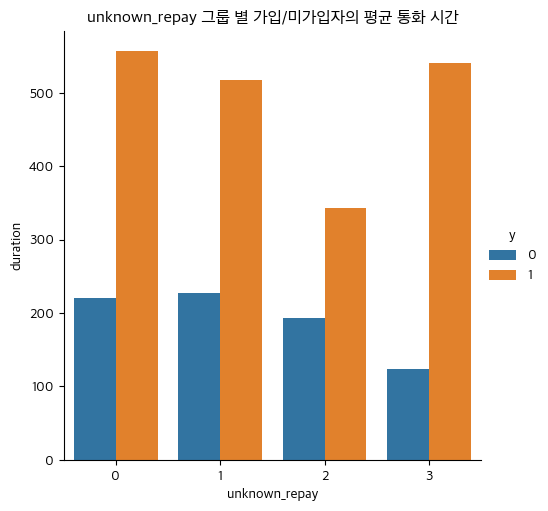

y                        0           1
unknown_credit                        
0               220.563842  527.045854
1               222.759733  801.895833
2               212.526237  523.437500
3               216.157407  818.000000


<Figure size 400x400 with 0 Axes>

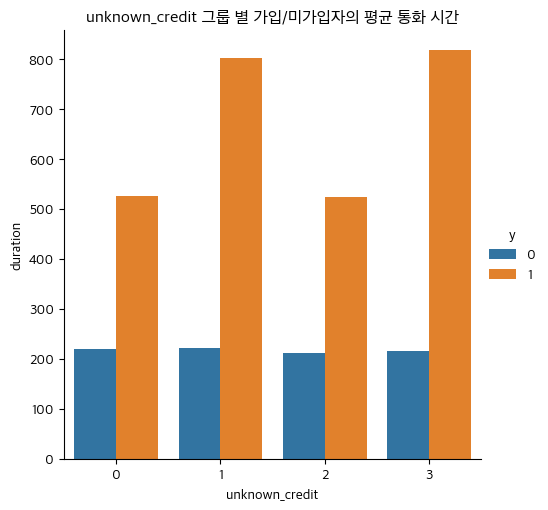

In [11]:
# 지속 시간 비교하기
unknown_list = ["unknown_count", "unknown_repay", "unknown_credit"]

for i in unknown_list:
    tmp_df = df.groupby([i,"y"])["duration"].mean().reset_index()
    tmp_pivot = tmp_df.pivot(index=i, columns="y", values="duration")
    print(tmp_pivot)
    plt.figure(figsize=(4,4))
    sns.catplot(data=tmp_df, kind="bar", x=i, y="duration", hue="y")
    plt.title(f"{i} 그룹 별 가입/미가입자의 평균 통화 시간")
    plt.show()

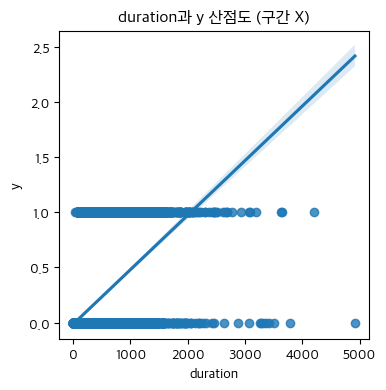

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/2351151353.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df["duration"] = (tmp_df["duration"]%30)*30


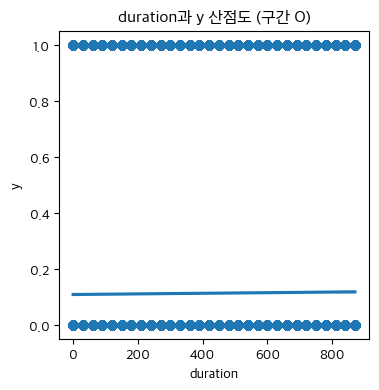

In [12]:
# duration과 y 산점도
tmp_df = df[["duration","y"]]

plt.figure(figsize=(4,4))
sns.regplot(data=tmp_df, x="duration", y="y")
plt.title("duration과 y 산점도 (구간 X)")
plt.show()

# duration의 구간을 30초로 쪼갠 후의 산점도
tmp_df = df[["duration","y"]]
tmp_df["duration"] = (tmp_df["duration"]%30)*30

plt.figure(figsize=(4,4))
sns.regplot(data=tmp_df, x="duration", y="y")
plt.title("duration과 y 산점도 (구간 O)")
plt.show()

그룹별 막대그래프와 산점도를 통해 Unknown 항목의 개수가 똑같아도, 통화 지속시간이 더 긴 그룹이 가입률이 높다고 해석할 수 있다.

또한, 가입 절차를 본격적으로 진행하기 위해 지속 시간이 길어졌을 수도 있다.

##### 연락 횟수

y                     0         1
unknown_count                    
0              2.593388  2.027216
1              2.738934  2.203822
2              2.747517  2.107692
3              2.780919  1.739130
4              2.700000       NaN
5              1.000000       NaN


<Figure size 400x400 with 0 Axes>

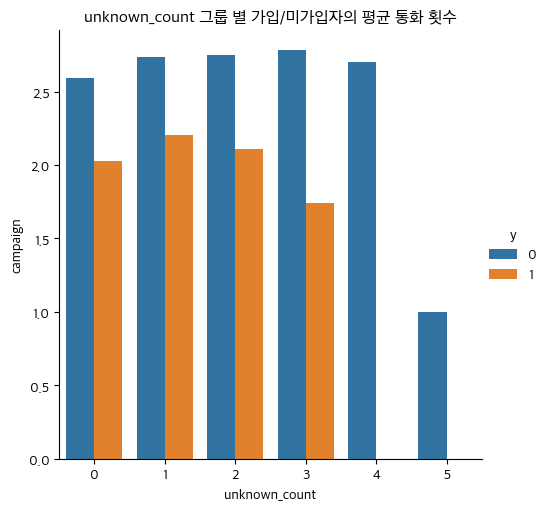

y                     0         1
unknown_repay                    
0              2.631257  2.050470
1              2.636364  2.083969
2              3.093220  2.062500
3              7.666667  1.000000


<Figure size 400x400 with 0 Axes>

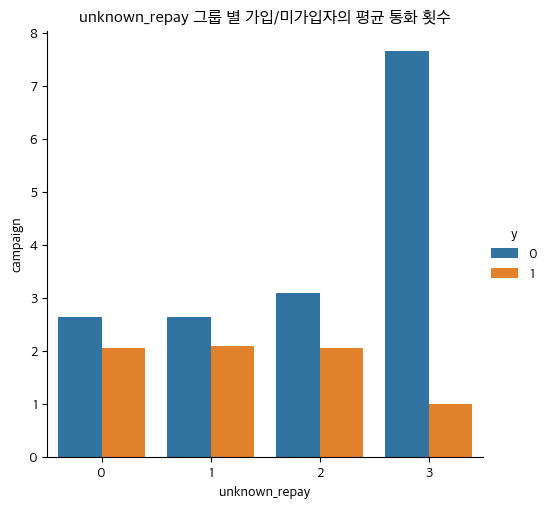

y                      0         1
unknown_credit                    
0               2.593282  2.023171
1               2.771198  2.388889
2               2.676162  1.812500
3               2.583333  1.636364


<Figure size 400x400 with 0 Axes>

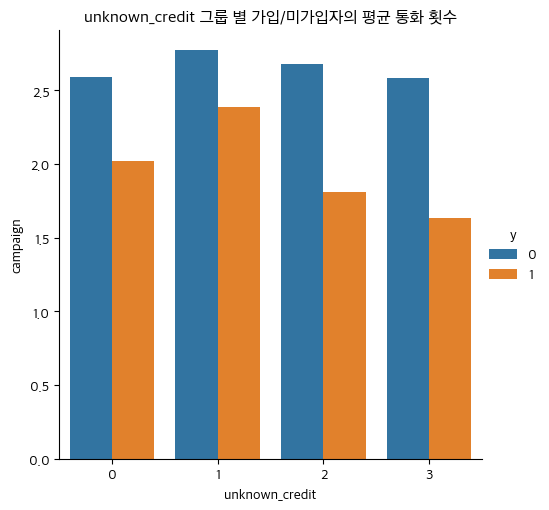

In [13]:
# 연락 횟수 비교하기
unknown_list = ["unknown_count", "unknown_repay", "unknown_credit"]

for i in unknown_list:
    tmp_df = df.groupby([i,"y"])["campaign"].mean().reset_index()
    tmp_pivot = tmp_df.pivot(index=i, columns="y", values="campaign")
    print(tmp_pivot)
    
    plt.figure(figsize=(4,4))
    sns.catplot(kind="bar", data=tmp_df, x=i, y="campaign", hue="y")
    plt.title(f"{i} 그룹 별 가입/미가입자의 평균 통화 횟수")

    plt.show()

가입까지의 연락 횟수는 가입자보다 미가입자가 더 많았다.

가입했다는 것은 마지막 연락임을 확언하는 것이지만,

가입을 거절당했다는 것은 언제든지 연락할 수 있다는 것을 의미하기 때문이라고 해석해보았다.

#### 결론: 통화 지속 시간은 긍정적인, 통화 횟수는 부정적인 영향을 미친다.

### 가설 확대: 통화 시간과 통화 횟수의 영향은 전체적인 데이터에서도 관찰될 것이다.

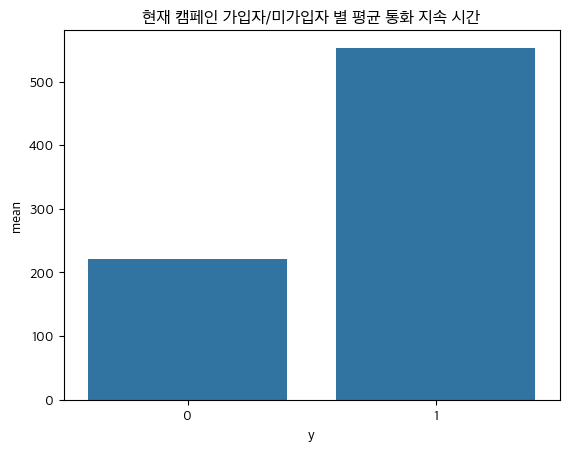

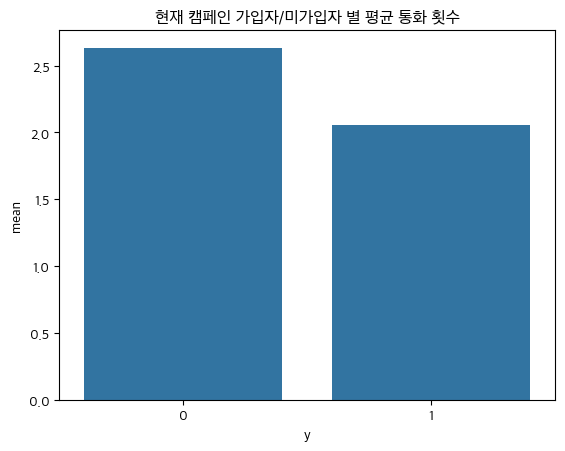

In [14]:
tmp_dict = {"duration": "통화 지속 시간", "campaign": "통화 횟수"}

for keys, values in tmp_dict.items():
    tmp_df = df.groupby("y")[keys].agg(["mean", "sum", "count"]).reset_index()

    plt.figure()
    sns.barplot(data=tmp_df, x="y", y="mean")
    plt.title(f"현재 캠페인 가입자/미가입자 별 평균 {values}")
    plt.show()

#### 결론: 통화 횟수와 지속 시간의 상관성은 전체 데이터에서도 유사하게 드러난다.

### 고객 정보 관련 결론: 현 캠페인의 통화 횟수는 부정적인 영향을, 통화 시간은 긍정적인 영향을 미친다.

---

## 이전 캠페인

### 가설 1 : 이전 캠페인의 통화 데이터에서 도움이 되는 정보를 찾을 수 있다.

#### 사전 수정

poutcome, pdays, previous의 값에서 혼동의 여지가 발견되어 먼저 수정하였다.

In [15]:
# 데이터 구분을 위한 임시 수정
tmp_df = df[["previous", "pdays", "poutcome"]].copy()
tmp_df.loc[tmp_df["pdays"] != 999, "pdays"] = 1
tmp_df.loc[tmp_df["pdays"] == 999, "pdays"] = 0
tmp_df.loc[tmp_df["previous"] != 0, "previous"] = 1
tmp_df.groupby("poutcome")[["previous", "pdays"]].value_counts()

poutcome     previous  pdays
failure      1         0         4110
                       1          142
nonexistent  0         0        35551
success      1         1         1373
Name: count, dtype: int64

기존 칼럼 구성
| 이전 캠페인 이력 | poutcome | previous | pdays |
|---|---|---|---|
| 없음(첫 방문) | nonexistent | 0 | 999 |
| 있음(예전에 시도 후 실패) | failure | != 0 | 999: 부재중 |
| 있음(예전에 시도 후 실패) | failure | != 0 | !=999: 전화 후 거절 |
| 있음 | success | != 0 | != 999 |

- poutcome이 success인 데이터 중 pdays가 0인 항목
    
    - pdays가 1인 데이터들도 존재하므로, 현재 캠페인 시작 직전 끝난 캠페인이라면 불가능한 데이터는 아니다.

- poutcome이 failure

    - pdays 칼럼만으로는 poutcome의 failure에 대한 추측을 전혀 할 수 없다.

    - failure의 pdays가 999인 경우: 전화를 시도했다가 부재중인 경우

        - pdays가 999인데 previous가 여러 번인 데이터도 존재하므로, 타당하다.

    - failure의 pdays가 999가 아닌 경우: 전화 받았고, 거절 당한 경우

수정 후 칼럼 구성
| 이전 캠페인 이력 | poutcome | previous | pdays |
|---|---|---|---|
| 없음(첫 방문) | nonexistent | 0 | 999 |
| 있음(연락 실패) | missing | != 0 | 999 |
| 있음(연락 성공 후 거절) | denied | != 0 | !=999 |
| 있음 | success | != 0 | != 999 |

In [16]:
# 칼럼 수정
df.loc[(df["poutcome"] == "failure") & (df["pdays"] == 999), "poutcome"] = "missing"
df.loc[(df["poutcome"] == "failure") & (df["pdays"] != 999), "poutcome"] = "denied"

print(df["poutcome"].value_counts())

poutcome
nonexistent    35551
missing         4110
success         1373
denied           142
Name: count, dtype: int64


이전에 한 번도 연락을 하지 않았던 고객이 35551명으로, 이전 캠페인과의 교집합이 상당히 적은 편이다.

#### 연락 횟수

지난 캠페인의 연락 횟수와 결과의 관계를 살펴본다.

<Figure size 640x480 with 0 Axes>

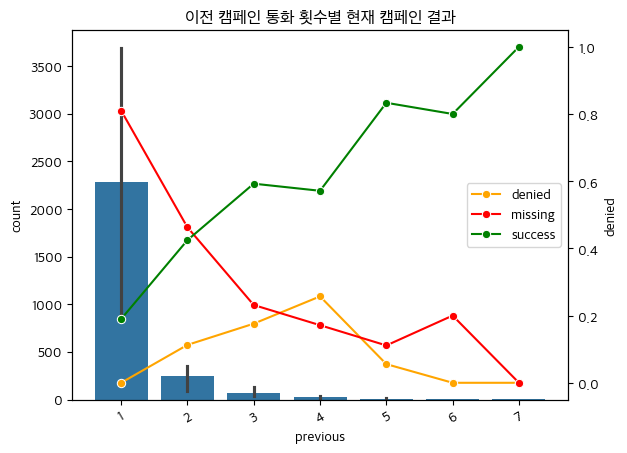

In [57]:
tmp_df1 = df.groupby("previous")["poutcome"].value_counts().reset_index()
tmp_df2 = df.groupby("previous")["poutcome"].value_counts(normalize=True).reset_index()

# nonexistent 삭제
tmp_df1 = tmp_df1.drop([0], axis=0)
tmp_df2 = tmp_df2.drop([0], axis=0)

tmp_pivot1 = tmp_df1.pivot(index="previous", columns="poutcome", values="count")
tmp_pivot1 = tmp_pivot1.fillna(0)
tmp_pivot1.index = tmp_pivot1.index.astype(str)

tmp_pivot2 = tmp_df2.pivot(index="previous", columns="poutcome", values="proportion")
tmp_pivot2 = tmp_pivot2.fillna(0)
tmp_pivot2.index = tmp_pivot2.index.astype(str)


plt.figure()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.barplot(data=tmp_df1, x="previous", y="count", ax=ax1)

line1 = sns.lineplot(data=tmp_pivot2, x="previous", y="denied", ax=ax2, marker="o", color="orange", label="denied")
line2 = sns.lineplot(data=tmp_pivot2, x="previous", y="missing", ax=ax2, marker="o", color="red", label="missing")
line3 = sns.lineplot(data=tmp_pivot2, x="previous", y="success", ax=ax2, marker="o", color="green", label="success")

ax1.tick_params(axis="x", rotation=30)
plt.title(f"이전 캠페인 통화 횟수별 현재 캠페인 결과")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="right")
ax2.get_legend().remove()

plt.show()

#### 결론: 이전 캠페인 통화 데이터에서 1차 학습을 진행할 수 없다.

- 통화 횟수

통화 횟수 자체가 일회성인 경우가 많다는 점과 함께 미루어 봤을 때, 통화 횟수가 가입률에 영향을 미친다고 확정 짓기는 어렵다.

통화 횟수가 많을수록 가입률도 높은 것으로 확인되므로, 이전 캠페인 데이터와 현재 캠페인 데이터의 통화 횟수 관련 결론은 상충된다.

- 통화 지속 시간

이전 캠페인에서의 통화 지속 시간 데이터가 없는 점을 보완할 필요가 있다.

1. 현재 캠페인 데이터에서 통화지속 시간이 예측에 일정 부분 도움이 되는 것으로 보이는데, 이전 캠페인 데이터에서 이를 검증할 수 없다.

2. 이전 데이터를 통해 poutcome을 예측하는 모델을 1차적으로 만들어 현재 캠페인에 도움이 될 수 있다.

### 가설 2: 이전 캠페인의 결과가 현재 캠페인의 결과에 영향을 미칠 것이다.

지난 캠페인의 결과와 현재 캠페인의 결과 양상을 살펴본다.

In [18]:
tmp_df = df.groupby("poutcome")["y"].agg(["mean", "sum", "count"]).reset_index()
tmp_df

,poutcome,mean,sum,count
0,denied,0.514085,73,142
1,missing,0.129440,532,4110
2,nonexistent,0.088324,3140,35551
3,success,0.651129,894,1373


지난 캠페인의 pdays와 현재 캠페인의 결과 양상을 살펴본다.

In [19]:
tmp_df = df[["pdays", "y"]]
tmp_df.loc[tmp_df["pdays"] != 999, "pdays"] = 1
tmp_df = tmp_df.groupby("pdays")["y"].agg(["mean", "sum", "count"]).reset_index()
tmp_df

,pdays,mean,sum,count
0,1,0.638284,967,1515
1,999,0.092585,3672,39661


#### 결론: 이전 캠페인을 진행하지 않은 그룹보다 이전에 캠페인을 진행했던 그룹이 가입률이 월등히 높다.

### 이전 캠페인 결론

1. 통화 횟수는 일관성이 부족하며, 통화 지속 시간은 유의미한 긍정적인 상관관계를 가진다.

2. 이전 캠페인을 진행한 그룹이 이전 캠페인을 진행하지 않은 그룹보다 가입률이 높다.

## 수치형 데이터 상관관계

<Axes: >

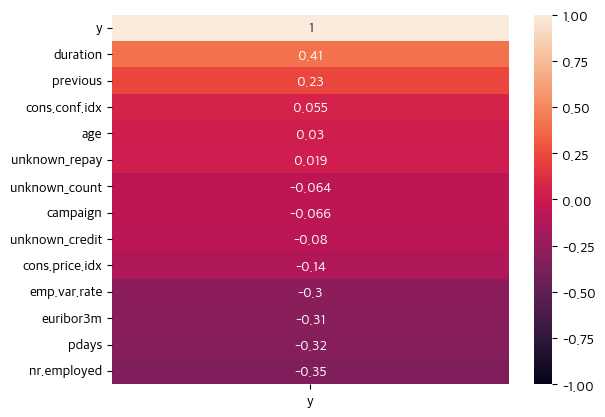

In [20]:
num_columns = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'unknown_repay',
       'unknown_credit', 'unknown_count']

sns.heatmap(df[num_columns].corr()[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True)

통화 시간과 이전 캠페인의 연락 횟수 외의 유의미한 상관관계는 드러나지 않는다.

1. 통화 시간은 결과론적인 요소이므로 궁극적으로는 활용할 수 없다.

2. 이전 캠페인의 연락 횟수는 가설에서 점검했듯 시각화 자료에서도 경향성을 살펴볼 수 있다.

## 범주형 데이터

In [21]:
tmp_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
for key, value in tmp_dict.items():
    df.loc[df["month"] == key, "month"] = value
df["month"] = df["month"].astype(int)

tmp_dict = {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5}
for key, value in tmp_dict.items():
    df.loc[df["day_of_week"] == key, "day_of_week"] = value
df["day_of_week"] = df["day_of_week"].astype(int)

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


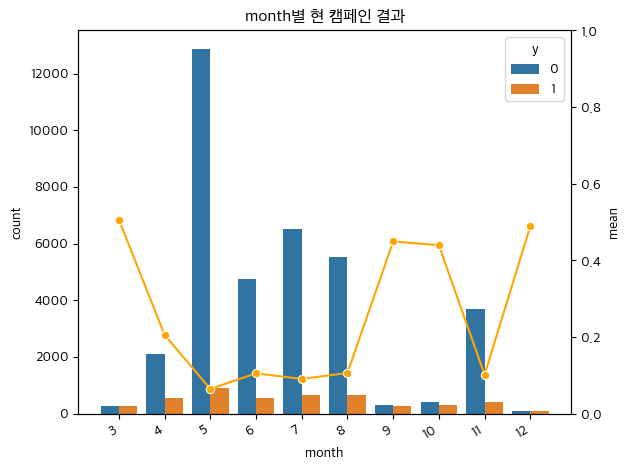

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


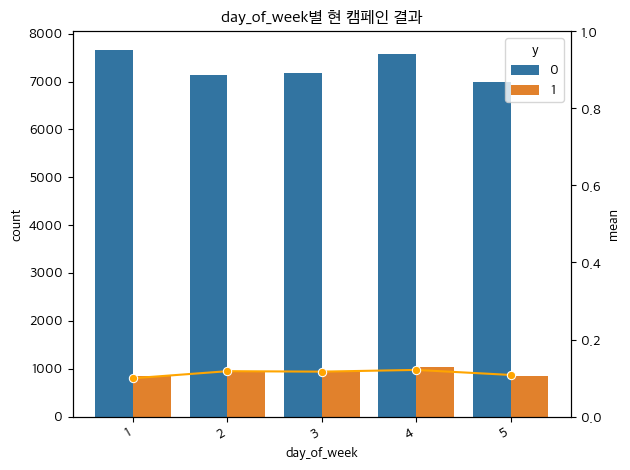

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


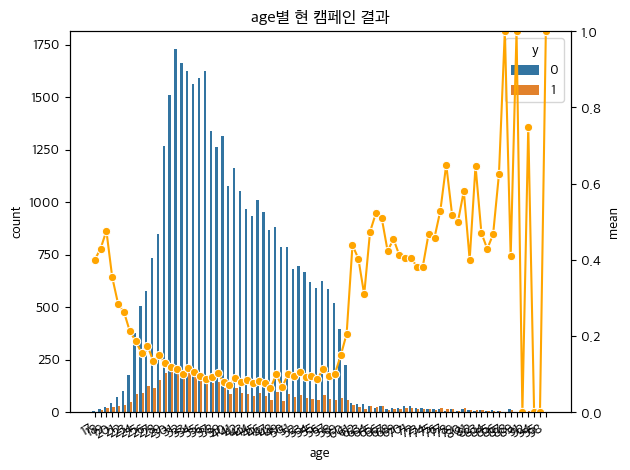

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


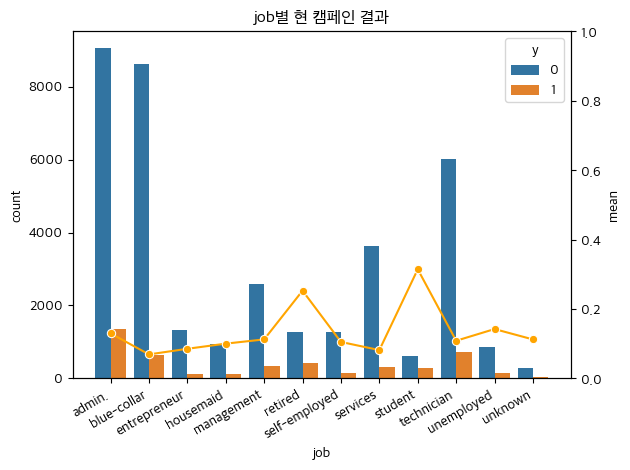

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


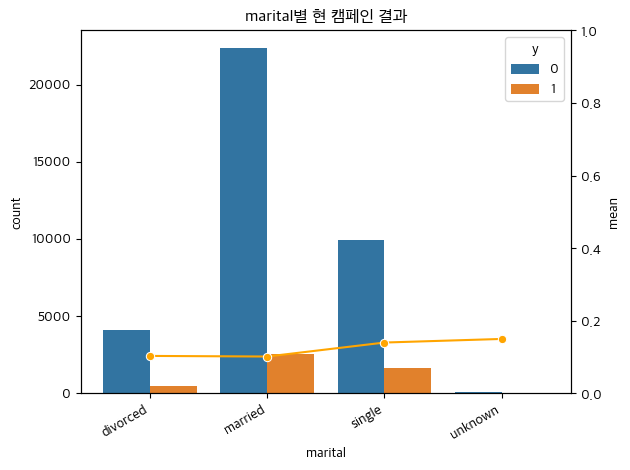

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


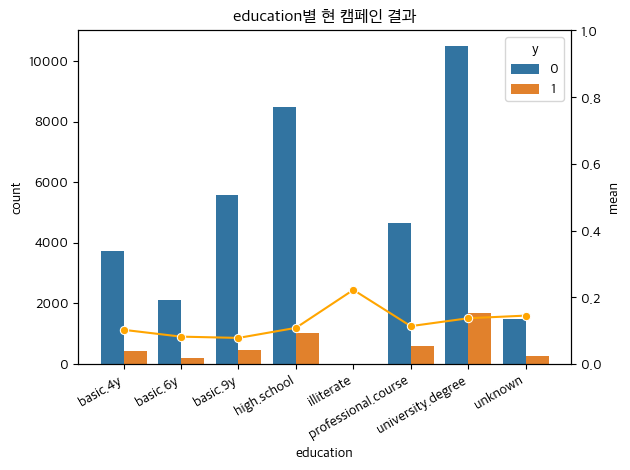

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


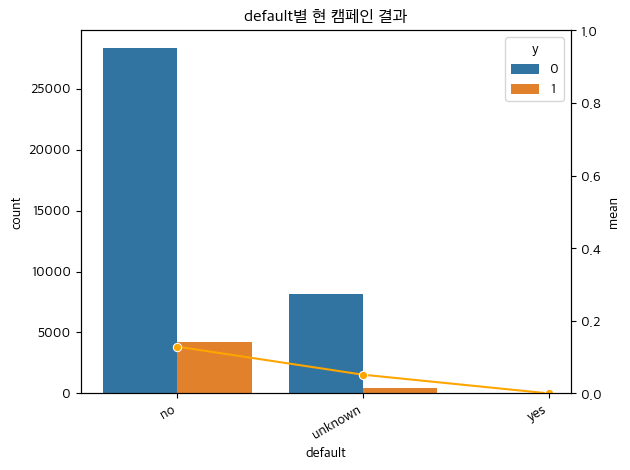

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


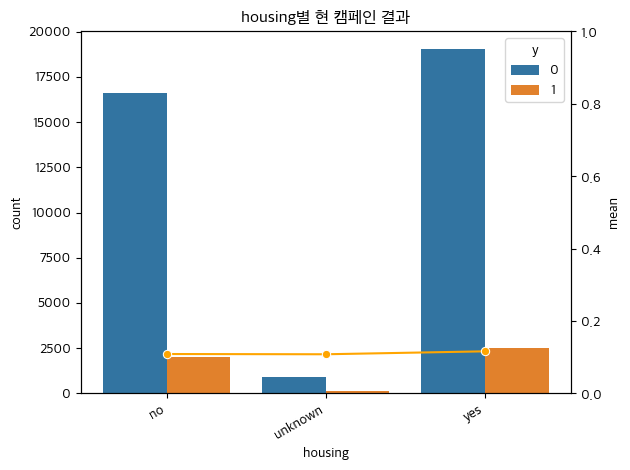

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


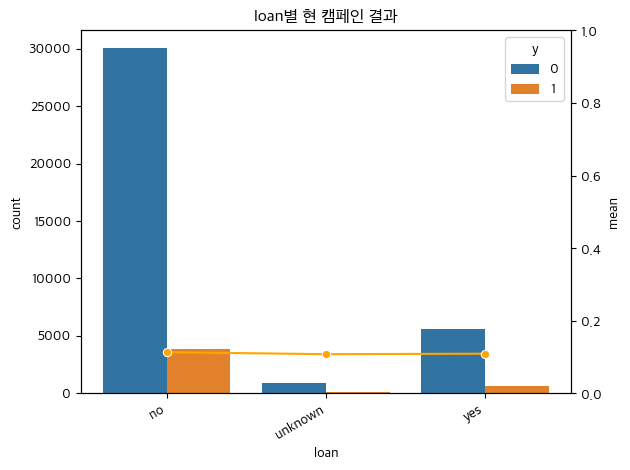

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/3781452594.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


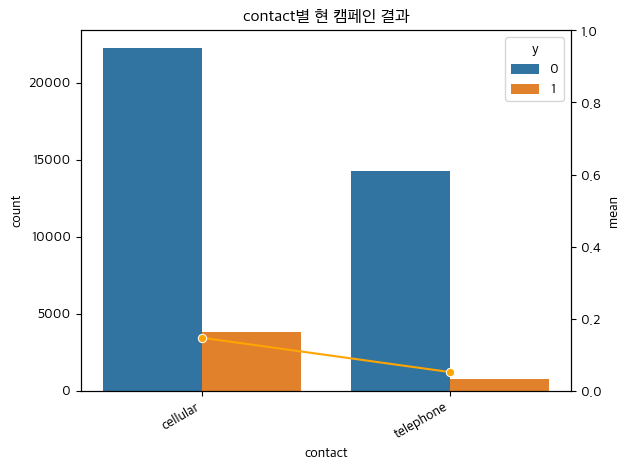

In [22]:
tmp_list = ['month', 'day_of_week', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

for i in tmp_list:
    tmp_df1 = df.groupby(i)["y"].agg(["mean", "sum", "count"])
    tmp_df2 = df.groupby(i)["y"].value_counts().reset_index()

    tmp_df1.index = tmp_df1.index.astype(str)
    tmp_df2.index = tmp_df2.index.astype(str)

    fig, ax1 = plt.subplots()
    sns.barplot(data=tmp_df2, x=i, y="count", hue="y", ax=ax1)

    ax2 = ax1.twinx()
    ax2.set_ylim(0,1)
    sns.lineplot(data=tmp_df1, x=i, y="mean", ax=ax2, marker="o", color="orange")

    ax1.tick_params(axis="x", rotation=30)
    ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")
    plt.title(f"{i}별 현 캠페인 결과")
    plt.tight_layout()
    plt.show()


## 결론

1. 통화 지속 시간이 가입률을 예측할 수 있는 결정적인 지표로 보인다.

2. 그러나, 통화 지속 시간은 캠페인 진행 후의 결과값으로, 통화 진행 전에는 통화 지속 시간을 알 수 없다.

3. 통화 지속 시간에 결정적인 영향을 미치는 요소를 확인하는 방향으로 진행해야 한다.

## 통화 지속 시간 관련 핵심 지표 탐색

### 수치형 데이터

<Axes: >

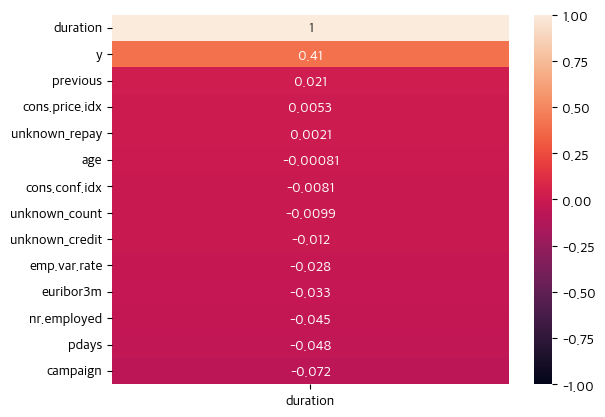

In [23]:
num_columns = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'unknown_repay',
       'unknown_credit', 'unknown_count']

sns.heatmap(df[num_columns].corr()[['duration']].sort_values(by='duration', ascending=False), vmin=-1, vmax=1, annot=True)

### 범주형 데이터

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


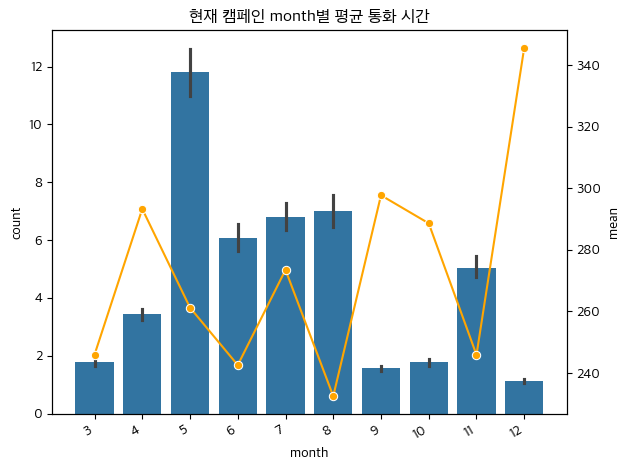

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


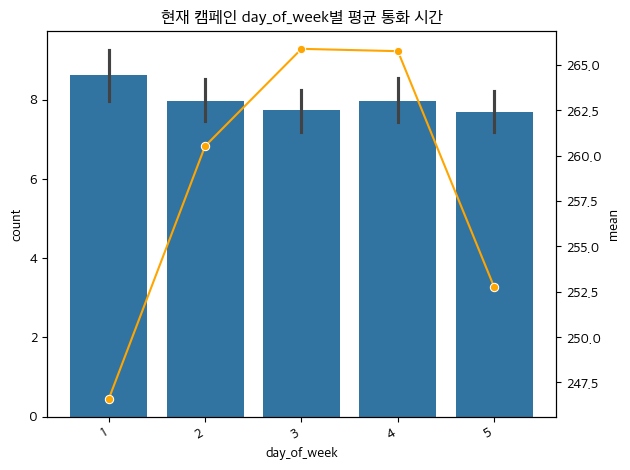

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


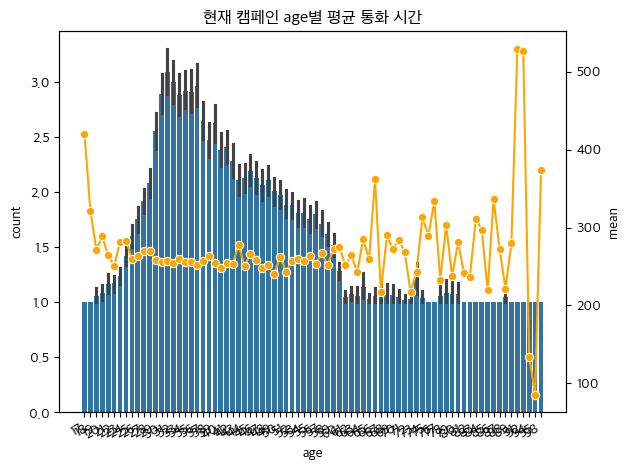

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


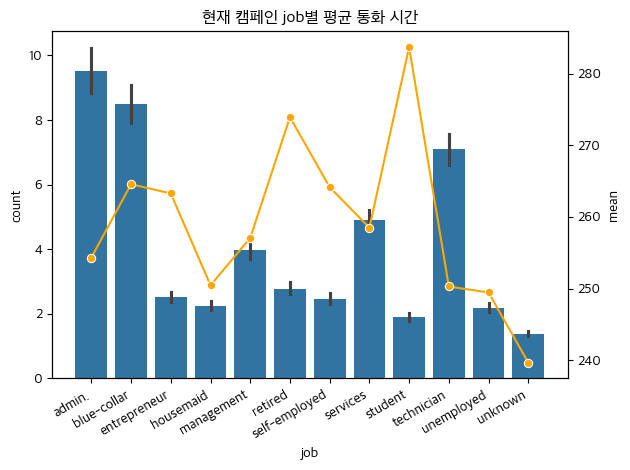

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


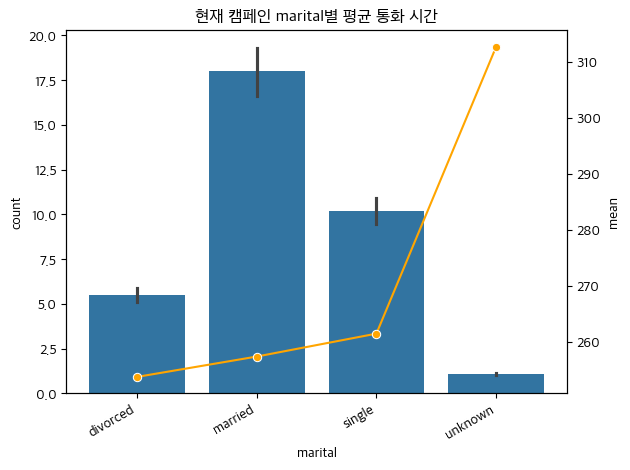

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


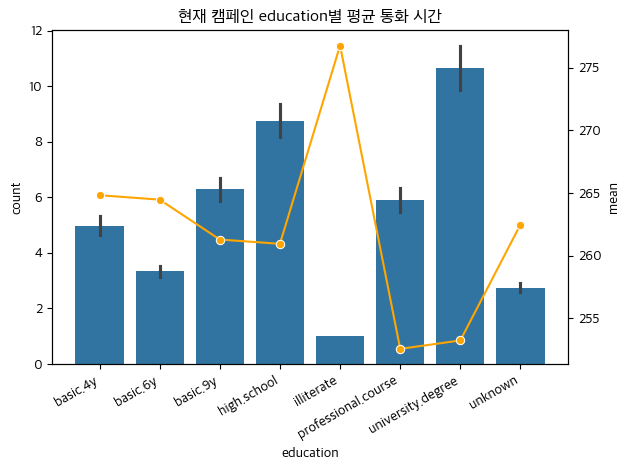

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


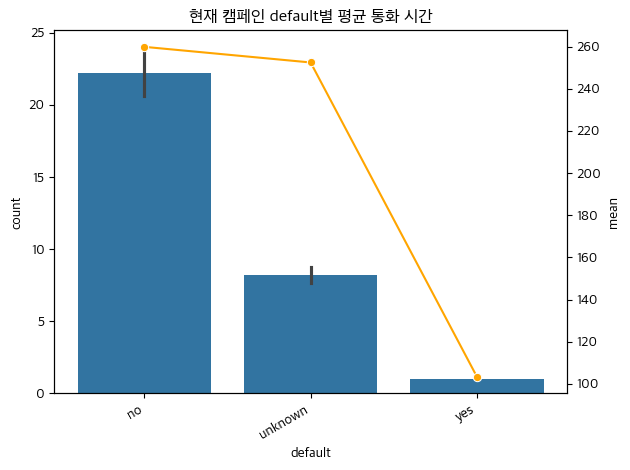

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


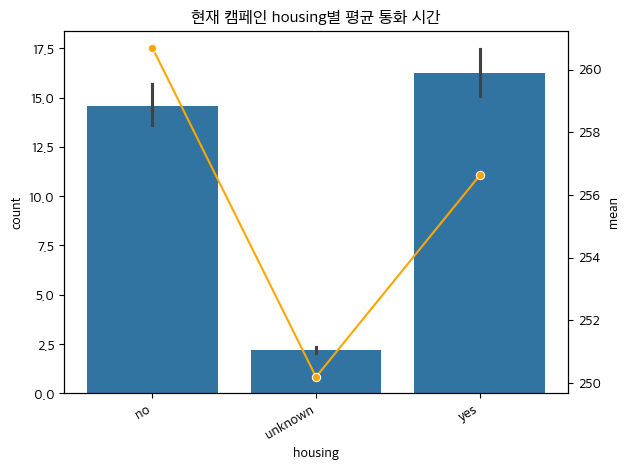

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


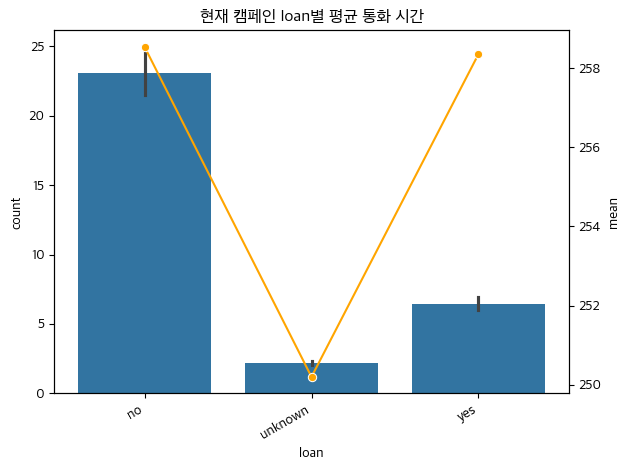

/var/folders/h6/_8g_zbns4n53222bttvjsx_40000gn/T/ipykernel_99464/4043824399.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")


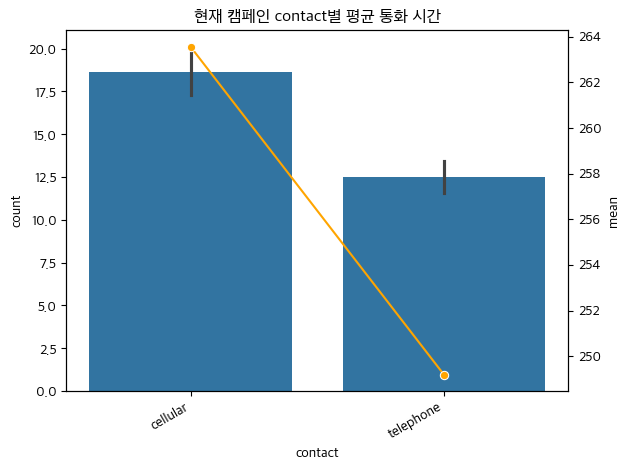

In [24]:
tmp_list = ['month', 'day_of_week', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

for i in tmp_list:
    tmp_df1 = df.groupby(i)["duration"].agg(["mean", "sum", "count"])
    tmp_df2 = df.groupby(i)["duration"].value_counts().reset_index()

    tmp_df1.index = tmp_df1.index.astype(str)
    tmp_df2.index = tmp_df2.index.astype(str)

    fig, ax1 = plt.subplots()
    sns.barplot(data=tmp_df2, x=i, y="count", ax=ax1)

    ax2 = ax1.twinx()
    sns.lineplot(data=tmp_df1, x=i, y="mean", ax=ax2, marker="o", color="orange")

    ax1.tick_params(axis="x", rotation=30)
    ax1.set_xticklabels(ax1.get_xticklabels(), ha="right")
    plt.title(f"현재 캠페인 {i}별 평균 통화 시간")
    plt.tight_layout()
    plt.show()

# 기타 사항

In [25]:
# housing을 loan의 일부로 보는지 확인 # 아님.
print(df[(df["loan"] == "yes") & (df["housing"] == "yes")].shape[0])
print(df[(df["loan"] == "yes") & (df["housing"] == "no")].shape[0])
print(df[(df["loan"] == "no") & (df["housing"] == "yes")].shape[0])
print(df[(df["loan"] == "no") & (df["housing"] == "no")].shape[0])

3691
2557
17880
16058


# 데이터 전처리

## 인코딩

1. 범주형에서 유불리한 정보는 거의 없으므로, 바이너리 혹은 원핫인코딩으로 진행한다.

2. 지속시간은 다음 캠페인을 시행하기 전 미리 파악할 수 없는 요소이다. 학습에서 제외해야 한다.

3. 이전 캠페인의 결과가 존재하는 그룹에서 파생 변수를 생성한다.

In [26]:
tmp_df = df.copy()

# 나이 극단치 조정
tmp_df.loc[tmp_df["age"] >= 80, "age"] = 80
tmp_df.loc[tmp_df["age"] < 20, "age"] = 20

# 학습에 사용될 수 없는 duration 삭제
tmp_df = tmp_df.drop(columns="duration")

# 이전 캠페인 이력이 있는 고객 여부 확인 칼럼 생성 및 pdays 제거
tmp_df["is_not_first"] = (tmp_df["previous"] != 0).astype(int)
tmp_df = tmp_df.drop(columns="pdays")

In [27]:
# duration 없는 모델 설계

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = tmp_df.drop(columns="y")
y = tmp_df["y"]

tmp_cat_list = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome", "is_not_first", "month", "day_of_week"]
tmp_num_list = X.columns.drop(tmp_cat_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), tmp_num_list),
        ("cat", OneHotEncoder(handle_unknown="ignore"), tmp_cat_list)
    ],
    remainder="passthrough"
)

In [28]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

result_df = pd.DataFrame(columns=["Model", "SMOTE", "duration", "F1_score"])

tmp_dict = {"LogisticRegression": LogisticRegression(max_iter=1000),
            "RandomForest": RandomForestClassifier(random_state=42), 
            "CatBoost": CatBoostClassifier(random_seed=42, verbose=False, task_type = 'CPU'), 
            "LGBMClassifier": lgb.LGBMClassifier(random_state=42, device = "cpu")}

for key, value in tmp_dict.items():
    pipe = Pipeline(steps=[
        ("prep", preprocessor),
        (key, value)
    ])

    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="f1")
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1_test = f1_score(y_test, y_pred)
    print(f"{key}_f1_test_score: {f1_test}")
    result_df.loc[len(result_df)] = [key, 0, 0, f1_test]


# SMOTE 포함 모델 설계

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

for key, value in tmp_dict.items():
    pipe = ImbPipeline(steps=[
        ("prep", preprocessor),
        ("smote", SMOTE(random_state=42)),
        (key, value)
    ])

    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="f1")

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1_test = f1_score(y_test, y_pred)
    print(f"{key}_f1_test_score_with_smote: {f1_test}")

    result_df.loc[len(result_df)] = [key, 1, 0, f1_test]

LogisticRegression_f1_test_score: 0.3180327868852459
RandomForest_f1_test_score: 0.3796753705010586
CatBoost_f1_test_score: 0.37668161434977576
[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112667 -> initscore=-2.063784
[LightGBM] [Info] Start training from score -2.063784


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 492
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112667 -> initscore=-2.063784
[LightGBM] [Info] Start training from score -2.063784


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 503
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112667 -> initscore=-2.063784
[LightGBM] [Info] Start training from score -2.063784


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112667 -> initscore=-2.063784
[LightGBM] [Info] Start training from score -2.063784


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2968, number of negative: 23384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 503
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112629 -> initscore=-2.064164
[LightGBM] [Info] Start training from score -2.064164


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3711, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112659 -> initscore=-2.063860
[LightGBM] [Info] Start training from score -2.063860


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier_f1_test_score: 0.36085626911314983
LogisticRegression_f1_test_score_with_smote: 0.45569620253164556
RandomForest_f1_test_score_with_smote: 0.41202254226675017
CatBoost_f1_test_score_with_smote: 0.4100769769069279
[LightGBM] [Info] Number of positive: 23383, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14977
[LightGBM] [Info] Number of data points in the train set: 46766, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 23383, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14919
[LightGBM] [Info] Number of data points in the train set: 46766, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 23383, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14956
[LightGBM] [Info] Number of data points in the train set: 46766, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 23383, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14975
[LightGBM] [Info] Number of data points in the train set: 46766, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 23384, number of negative: 23384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14951
[LightGBM] [Info] Number of data points in the train set: 46768, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15126
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBMClassifier_f1_test_score_with_smote: 0.43224932249322495


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [29]:
# duration 포함 모델 설계

tmp_df = df.copy()

# 유의미하지 않은 변수 삭제
tmp_df = tmp_df.drop(columns=["unknown_repay", "unknown_credit", "unknown_count"])

# 이전 캠페인 이력이 있는 고객 여부 확인 칼럼 생성 및 pdays 제거
tmp_df["is_not_first"] = (tmp_df["previous"] != 0).astype(int)
tmp_df = tmp_df.drop(columns="pdays")

X = tmp_df.drop(columns="y")
y = tmp_df["y"]

tmp_cat_list = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome", "is_not_first", "month", "day_of_week"]
tmp_num_list = X.columns.drop(tmp_cat_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), tmp_num_list),
        ("cat", OneHotEncoder(handle_unknown="ignore"), tmp_cat_list)
    ],
    remainder="passthrough"
)

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

tmp_dict = {"LogisticRegression": LogisticRegression(max_iter=1000),
            "RandomForest": RandomForestClassifier(random_state=42), 
            "CatBoost": CatBoostClassifier(random_seed=42, verbose=False, task_type = 'CPU'), 
            "LGBMClassifier": lgb.LGBMClassifier(random_state=42, device = "cpu")}

for key, value in tmp_dict.items():
    pipe = Pipeline(steps=[
        ("prep", preprocessor),
        (key, value)
    ])

    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="f1")
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1_test = f1_score(y_test, y_pred)
    print(f"{key}_f1_test_score: {f1_test}")
    result_df.loc[len(result_df)] = [key, 0, 1, f1_test]


# duration, SMOTE 포함 모델 설계

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

for key, value in tmp_dict.items():
    pipe = ImbPipeline(steps=[
        ("prep", preprocessor),
        ("smote", SMOTE(random_state=42)),
        (key, value)
    ])

    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="f1")

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1_test = f1_score(y_test, y_pred)
    print(f"{key}_f1_test_score_with_smote: {f1_test}")

    result_df.loc[len(result_df)] = [key, 1, 1, f1_test]

LogisticRegression_f1_test_score: 0.5003362474781439
RandomForest_f1_test_score: 0.5531645569620253
CatBoost_f1_test_score: 0.6059199071387116
[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 753
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112667 -> initscore=-2.063784
[LightGBM] [Info] Start training from score -2.063784


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 746
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112667 -> initscore=-2.063784
[LightGBM] [Info] Start training from score -2.063784


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112667 -> initscore=-2.063784
[LightGBM] [Info] Start training from score -2.063784


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2969, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112667 -> initscore=-2.063784
[LightGBM] [Info] Start training from score -2.063784


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2968, number of negative: 23384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 26352, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112629 -> initscore=-2.064164
[LightGBM] [Info] Start training from score -2.064164


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3711, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112659 -> initscore=-2.063860
[LightGBM] [Info] Start training from score -2.063860


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier_f1_test_score: 0.6149490373725934
LogisticRegression_f1_test_score_with_smote: 0.6058844896476571
RandomForest_f1_test_score_with_smote: 0.6071987480438185
CatBoost_f1_test_score_with_smote: 0.6264274061990212
[LightGBM] [Info] Number of positive: 23383, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14530
[LightGBM] [Info] Number of data points in the train set: 46766, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 23383, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14493
[LightGBM] [Info] Number of data points in the train set: 46766, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 23383, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14500
[LightGBM] [Info] Number of data points in the train set: 46766, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 23383, number of negative: 23383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14581
[LightGBM] [Info] Number of data points in the train set: 46766, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 23384, number of negative: 23384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14527
[LightGBM] [Info] Number of data points in the train set: 46768, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15090
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBMClassifier_f1_test_score_with_smote: 0.6594700686947988


/Users/won/.local/share/mise/installs/python/3.13.9/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [30]:
result_df

,Model,SMOTE,duration,F1_score
0,LogisticRegression,0,0,0.318033
1,RandomForest,0,0,0.379675
2,CatBoost,0,0,0.376682
3,LGBMClassifier,0,0,0.360856
4,LogisticRegression,1,0,0.455696
5,RandomForest,1,0,0.412023
6,CatBoost,1,0,0.410077
7,LGBMClassifier,1,0,0.432249
8,LogisticRegression,0,1,0.500336
9,RandomForest,0,1,0.553165


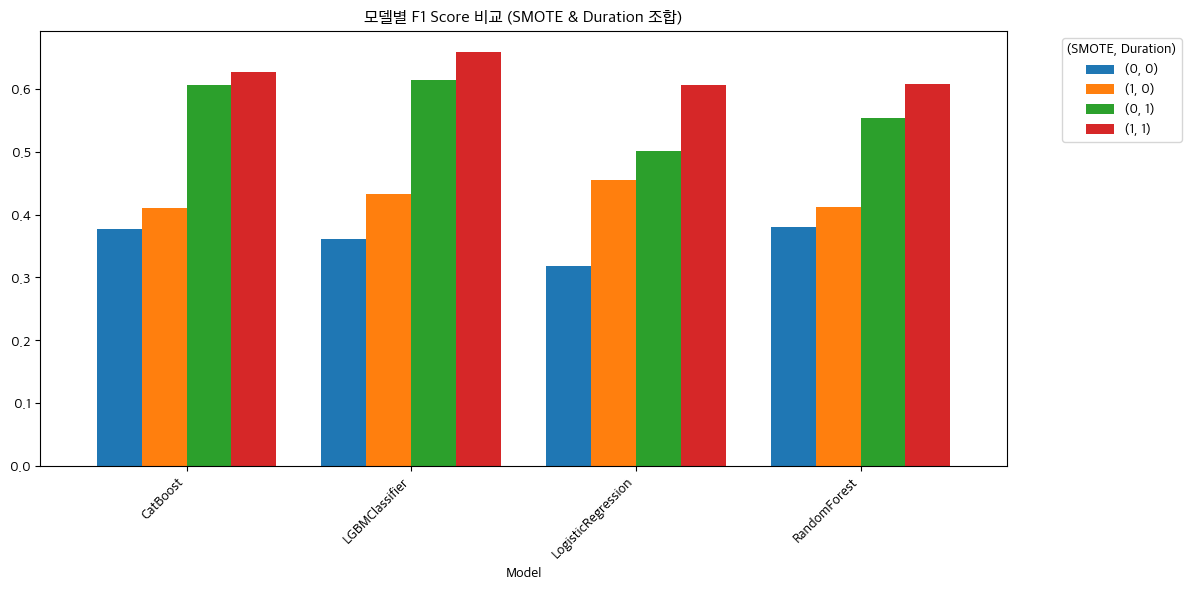

In [41]:
tmp_pivot = result_df.pivot(index="Model", columns=["SMOTE", "duration"], values="F1_score")

fig, ax = plt.subplots(figsize=(12, 6))
tmp_pivot.plot(kind="bar", ax=ax, width=0.8)
plt.title("모델별 F1 Score 비교 (SMOTE & Duration 조합)")
plt.legend(title="(SMOTE, Duration)", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 결론

1. duration이 학습 데이터에 포함되었을 때 모델의 예상 성능이 향상되는 것을 확인할 수 있다. 

2. 이를 통해, 지난 데이터의 통화 시간도 함께 데이터로 기록하여 미래 캠페인의 예측에 도움이 되어야 한다는 결론을 얻을 수 있다.

3. 저번 캠페인을 경험한 그룹이 가입률이 높았다는 점에서, 이번에 처음으로 접한 신규 잠재 고객들을 다음 캠페인에도 포함시켜야 한다는 결론을 얻을 수 있다.

4. duration을 학습 데이터에 포함할 수 없다는 상황에서, 가장 현실성 높은 고성능 모델은 SMOTE를 포함한 LogisticRegression이다.